In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import queue

In [2]:
# Create a Graph class
class HanoiGraph(object):
    ''' Class to represent a Graph
        Construction : Using Edges
    '''
    def __init__(self):
        self.edges = {} #example {(1,2,3,3),(...),(...)}
    
    def all_edges(self):
        return self.edges
    
    def neighbors(self, node):
        return self.edges[node] 

In [3]:
# Function to convert a maze to a graph
def gen_graph():
    ''' Converts a 2D binary maze to corresponding graph
        Input : 2D NumPy array with 0 and 1 as elements
        Output : MazeGraph corresponding to input maze
    '''
    
    
    hanoiGraph = HanoiGraph()
    #(disk1, disk2, disk3, disk4) = (3,3,3,3) # tower 0 to tower 2, Disk 4 is the smallest
    
    for disk1 in range(1,4):
        for disk2 in range(1,4):
            for disk3 in range(1,4):
                for disk4 in range(1,4):
                    # for each node/possible position of disks

                    neighbors = []
                    '''
                    # Determine possible edges
                    smallestTower0 = 0
                    smallestTower1 = 0
                    smallestTower2 = 0
                    diskNum = 1
                    
                    for disk in (disk1,disk2,disk3,disk4):
                        if disk == 0:
                            smallestTower0 = diskNum
                        else if disk == 1:
                            smallestTower1 = diskNum
                        else if disk == 2:
                            smallestTower2 = diskNum
                        diskNum++
                    
                    if smallestTower0 < smallestTower1:
                        neighbors.append()
                    if smallestTower1 < smallestTower2:
                        neighbors.append()
                    '''
                    
                    for m in range(1,4): # check disk4 movability
                        if(disk4 != m): # ensure that it does not move to itself
                            neighbors.append( ((disk1,disk2,disk3,m),1) )
                            
                    if(disk3 != disk4):
                        if((disk3==1 and disk4==2) or (disk3==2 and disk4==1)):
                            neighbors.append( ((disk1,disk2,3,disk4),1) )
                        elif((disk3==1 and disk4==3) or (disk3==3 and disk4==1)):
                            neighbors.append( ((disk1,disk2,2,disk4),1) )
                        elif(((disk3==3 and disk4==2) or (disk3==2 and disk4==3))):
                            neighbors.append( ((disk1,disk2,1,disk4),1) )
                            
                    elif(disk2 != disk4):
                        if((disk2==1 and disk4==2) or (disk2==2 and disk4==1)):
                            neighbors.append( ((disk1,3,disk3,disk4),1) )
                        elif((disk2==1 and disk4==3) or (disk2==3 and disk4==1)):
                            neighbors.append( ((disk1,2,disk3,disk4),1) )
                        elif((disk2==3 and disk4==2) or (disk2==2 and disk4==3)):
                            neighbors.append( ((disk1,1,disk3,disk4),1) )
                            
                    elif(disk1 != disk4):
                        if((disk1==1 and disk4==2) or (disk1==2 and disk4==1)):
                            neighbors.append( ((3,disk2,disk3,disk4),1) )
                        elif((disk1==1 and disk4==3) or (disk1==3 and disk4==1)):
                            neighbors.append( ((2,disk2,disk3,disk4),1) )
                        elif((disk1==3 and disk4==2) or (disk1==2 and disk4==3)):
                            neighbors.append( ((1,disk2,disk3,disk4),1) )

                    # Insert edges in the graph
                    if len(neighbors) > 0:
                        hanoiGraph.edges[(disk1,disk2,disk3,disk4)] = neighbors

    return hanoiGraph

In [4]:
hanoiGraph = gen_graph()

hanoiGraph.all_edges()

{(1, 1, 1, 1): [((1, 1, 1, 2), 1), ((1, 1, 1, 3), 1)],
 (1, 1, 1, 2): [((1, 1, 1, 1), 1), ((1, 1, 1, 3), 1), ((1, 1, 3, 2), 1)],
 (1, 1, 1, 3): [((1, 1, 1, 1), 1), ((1, 1, 1, 2), 1), ((1, 1, 2, 3), 1)],
 (1, 1, 2, 1): [((1, 1, 2, 2), 1), ((1, 1, 2, 3), 1), ((1, 1, 3, 1), 1)],
 (1, 1, 2, 2): [((1, 1, 2, 1), 1), ((1, 1, 2, 3), 1), ((1, 3, 2, 2), 1)],
 (1, 1, 2, 3): [((1, 1, 2, 1), 1), ((1, 1, 2, 2), 1), ((1, 1, 1, 3), 1)],
 (1, 1, 3, 1): [((1, 1, 3, 2), 1), ((1, 1, 3, 3), 1), ((1, 1, 2, 1), 1)],
 (1, 1, 3, 2): [((1, 1, 3, 1), 1), ((1, 1, 3, 3), 1), ((1, 1, 1, 2), 1)],
 (1, 1, 3, 3): [((1, 1, 3, 1), 1), ((1, 1, 3, 2), 1), ((1, 2, 3, 3), 1)],
 (1, 2, 1, 1): [((1, 2, 1, 2), 1), ((1, 2, 1, 3), 1), ((1, 3, 1, 1), 1)],
 (1, 2, 1, 2): [((1, 2, 1, 1), 1), ((1, 2, 1, 3), 1), ((1, 2, 3, 2), 1)],
 (1, 2, 1, 3): [((1, 2, 1, 1), 1), ((1, 2, 1, 2), 1), ((1, 2, 2, 3), 1)],
 (1, 2, 2, 1): [((1, 2, 2, 2), 1), ((1, 2, 2, 3), 1), ((1, 2, 3, 1), 1)],
 (1, 2, 2, 2): [((1, 2, 2, 1), 1), ((1, 2, 2, 3), 1), ((3

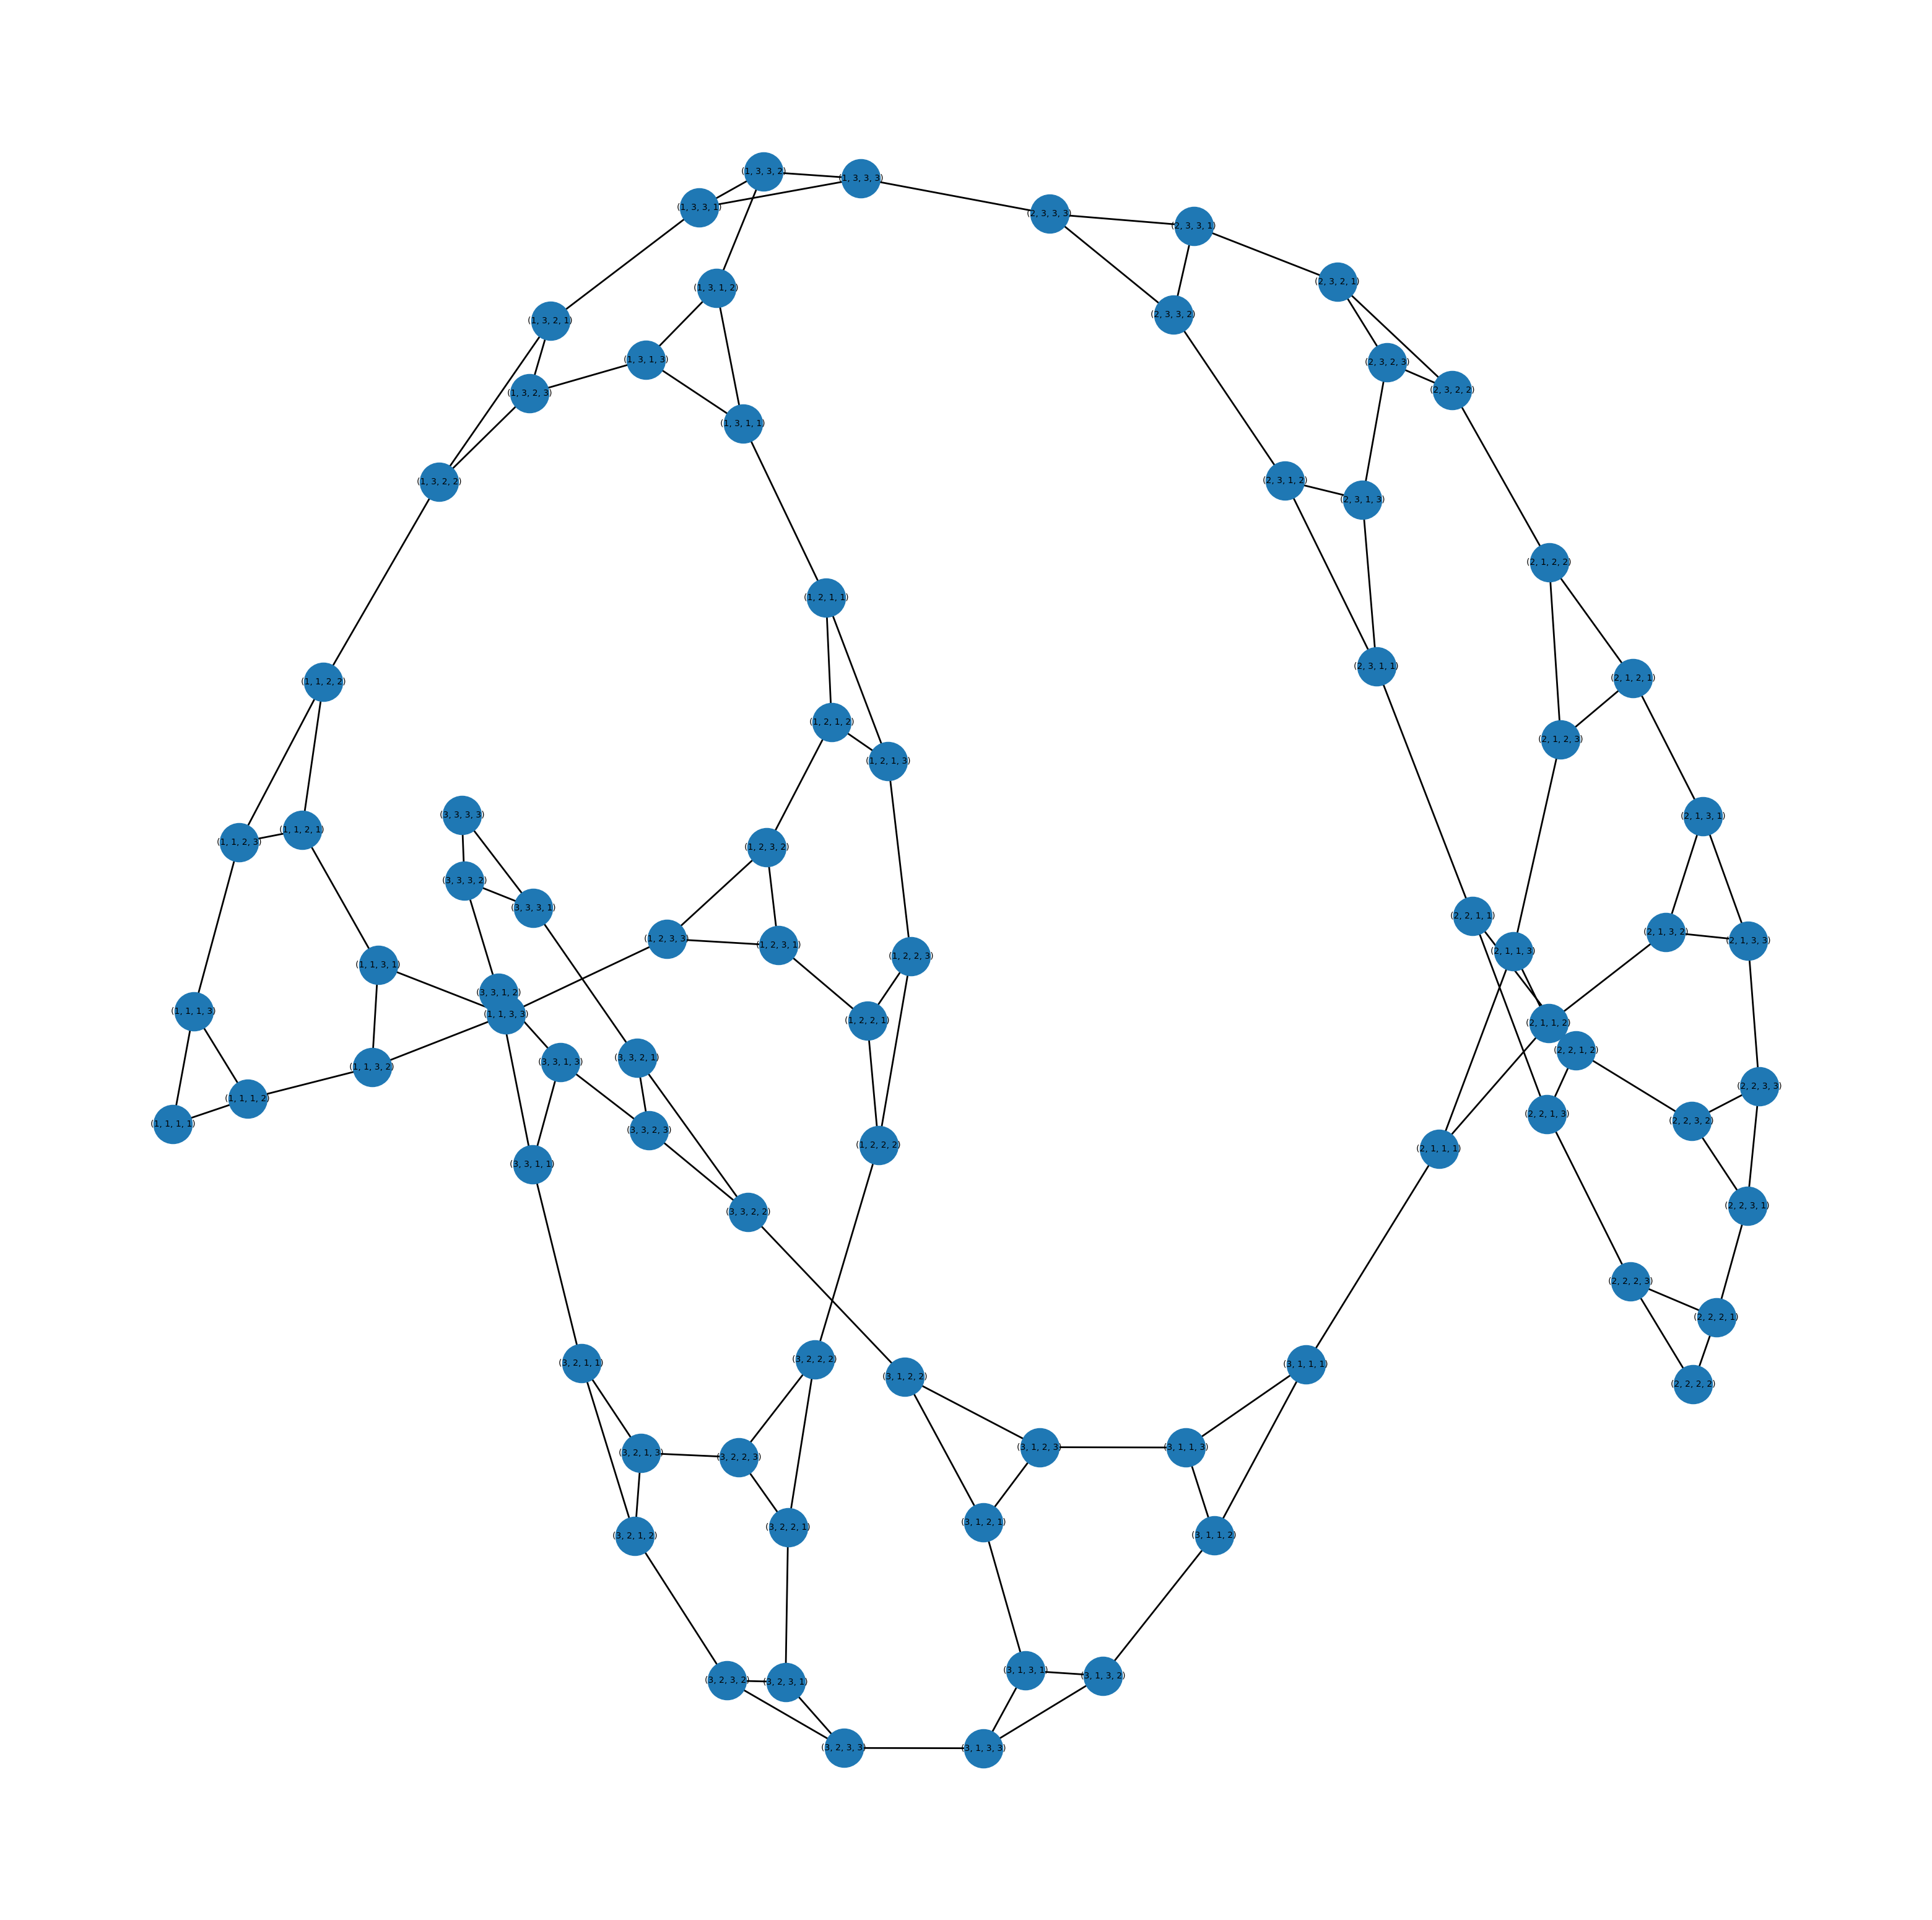

In [35]:
# Helper functions to display a Graph

def showBinaryMazeGraph(hanoiGraph):
    ''' Display a graph using networkx
        Input : MazeGraph from 2D maze
        Output : Input graph displayed
    '''
    edgeDict = hanoiGraph.all_edges()
    edgeList = []
    for node in edgeDict:
        for neighbor, weight in edgeDict[node]:
            edgeList.append((node,neighbor, {'weight': weight}))

    G = nx.Graph()
    G.add_edges_from(edgeList)

    f = plt.figure(figsize = (40,40))
    pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size = 2000)
    nx.draw_networkx_edges(G, pos, width = 2)
    nx.draw_networkx_labels(G, pos, font_size = 10)

    plt.axis("off")
    plt.show()
    
    
showBinaryMazeGraph(hanoiGraph)

In [23]:
#Print tower
def printState(state):
    towerHeight = [0,0,0] #tower are located at 
    dispHeight = 5;
    diskWidth = 5;
    
    towers=[[0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0,],
            [0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0,],
            [0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0,],
            [0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0,],
            [0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0,],
            [0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0,]]
    
    for i in range(4):
        for j in range(diskWidth*2-1):
            towers[dispHeight-towerHeight[state[i]-1]] [10*(state[i]-1)+5-diskWidth+j] = i+1
            
        towerHeight[state[i]-1]+=1
        diskWidth-=1
        
    #print(towerHeight)
    
    plt.figure(figsize = (5,2))
    image = sns.heatmap(towers, cmap = 'CMRmap_r', cbar=False, vmin=0, vmax=5)
    
    # Individual Values -> "ticks"
    image.set(xticklabels=["","","Tower 1","","","","","Tower 2","","","","","Tower 3","",""], yticklabels=[])
    image.tick_params(left=False,bottom=False)  # remove the ticks
    image.set(title='Tower Of Hanoi')

    plt.show()
    

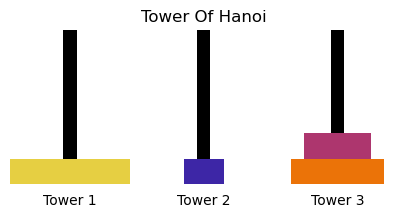

In [24]:
printState((1,3,3,2))

## Breadth-First-Search (BFS) with FIFO Queue

In [ ]:
# Breadth-First-Search (BFS) with FIFO Queue

def breadth_first_search(mazeGraph, start, goal):
    ''' Function to perform BFS to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.Queue()    # FIFO Queue for Frontier
    
    # initialization
    frontier.put(start)         # Add the start node to frontier
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    processed = 0               # Count of total nodes processed
    
    while not frontier.empty():
        # get next node from frontier
        currentNode = frontier.get()
        processed += 1
        
        # stop when goal is reached
        if currentNode == goal:
            break
        
        # explore every single neighbor of current node
        for nextNode, weight in mazeGraph.neighbors(currentNode):
           
            # ignore if it has already been explored
            if nextNode not in explored:
                
                # put new node in frontier
                frontier.put(nextNode)
                
                # assign current node as parent
                explored[nextNode] = currentNode
    
    return explored, processed

# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

Breadth-First-Search (BFS)

Final path distance : 11
Total Number of nodes processed : 62

Path through the Maze : [(1, 3, 3, 2), (1, 3, 1, 2), (1, 3, 1, 1), (1, 2, 1, 1), (1, 2, 1, 3), (1, 2, 2, 3), (1, 2, 2, 2), (3, 2, 2, 2), (3, 2, 2, 1), (3, 2, 3, 1), (3, 2, 3, 3)]


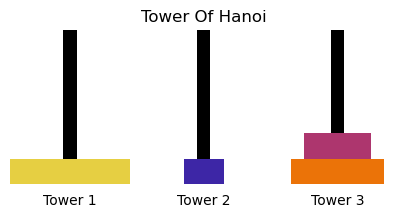

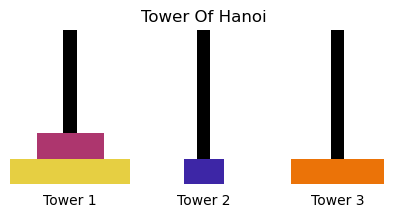

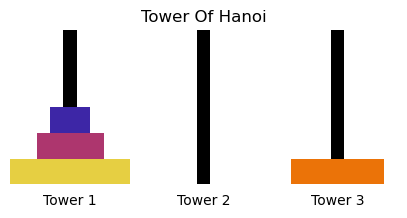

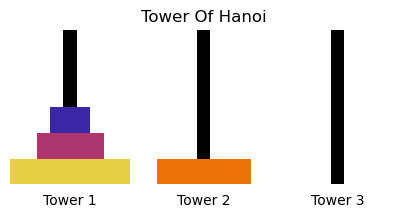

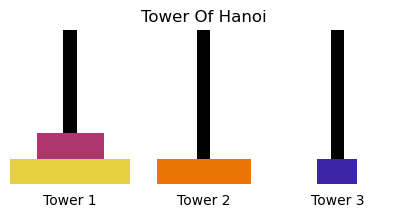

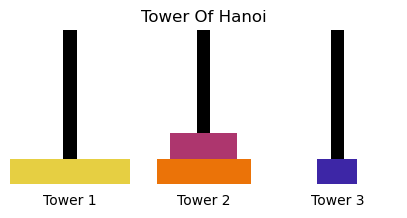

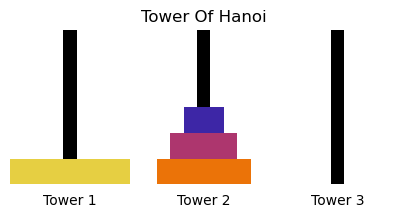

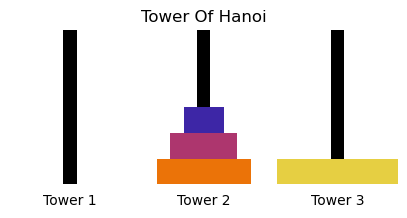

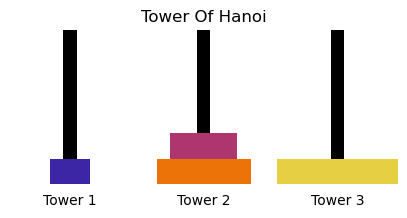

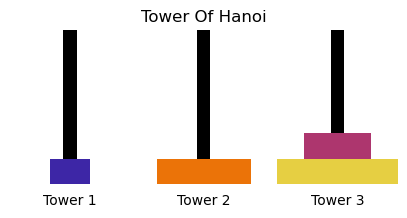

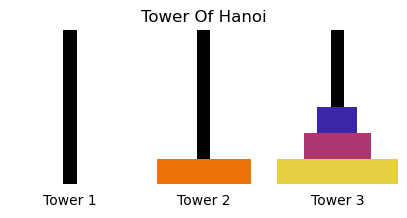

In [34]:
# Define start and goal positions
START = (1,3,3,2) #INPUT START
GOAL = (3,2,3,3) #INPUT GOAL

# Run the BFS algorithm for path finding
nodesExplored, nodesProcessed = breadth_first_search(hanoiGraph, start = START, goal = GOAL)
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("Breadth-First-Search (BFS)")
print()
print("Final path distance :", len(path))
print("Total Number of nodes processed :", nodesProcessed)
print()

# Print the path and show using helper functions
print("Path through the Maze :", path)

for i in path:
    printState(i)

## Depth-First-Search(DFS)

In [30]:
# Depth-First-Search (DFS) with LIFO Queue

def depth_first_search(hanoiGraph, start, goal):
    ''' Function to perform DFS to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.LifoQueue()      # LIFO Queue for Frontier
    
    # initialization
    frontier.put(start)         # Add the start node to frontier
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    processed = 0               # Count of total nodes processed
    
    while not frontier.empty():
        # get next node from frontier
        currentNode = frontier.get()
        processed += 1
        
        # stop when goal is reached
        if currentNode == goal:
            break
        
        # explore every single neighbor of current node
        for nextNode, weight in hanoiGraph.neighbors(currentNode):
            
            # ignore if it has already been explored
            if nextNode not in explored:
                
                # put new node in frontier
                frontier.put(nextNode)
                
                # assign current node as parent
                explored[nextNode] = currentNode
    
    return explored, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

Depth-First-Search (DFS) with LIFO Queue

Final path distance : 23
Total Number of nodes processed : 23

Path through the Maze : [(1, 3, 3, 2), (1, 3, 1, 2), (1, 3, 1, 3), (1, 3, 2, 3), (1, 3, 2, 2), (1, 1, 2, 2), (1, 1, 2, 3), (1, 1, 1, 3), (1, 1, 1, 2), (1, 1, 3, 2), (1, 1, 3, 3), (1, 2, 3, 3), (1, 2, 3, 2), (1, 2, 1, 2), (1, 2, 1, 3), (1, 2, 2, 3), (1, 2, 2, 2), (3, 2, 2, 2), (3, 2, 2, 3), (3, 2, 1, 3), (3, 2, 1, 2), (3, 2, 3, 2), (3, 2, 3, 3)]


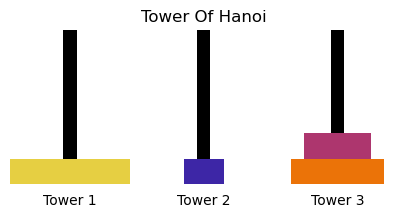

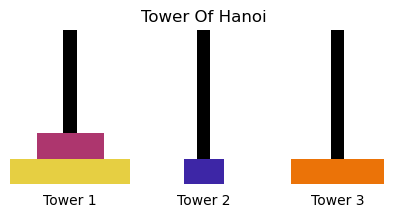

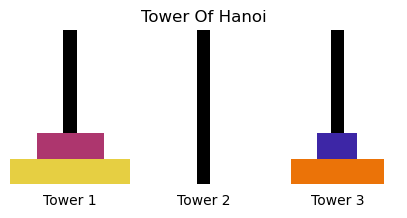

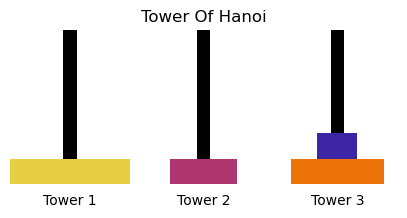

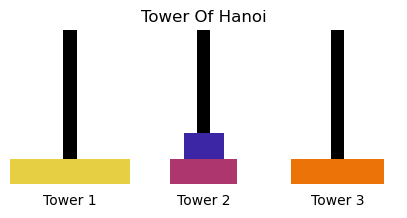

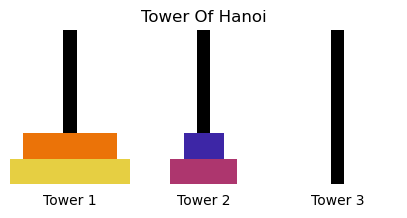

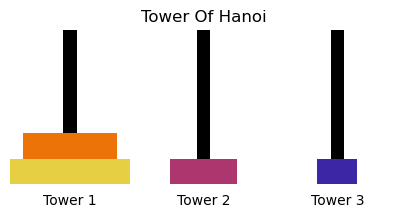

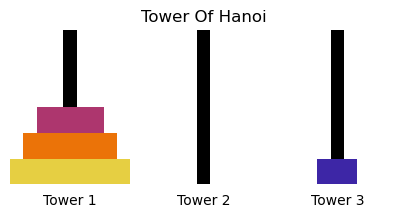

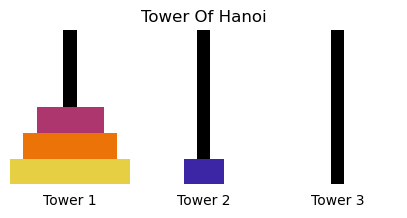

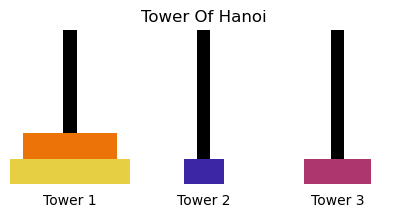

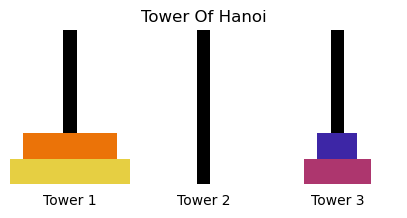

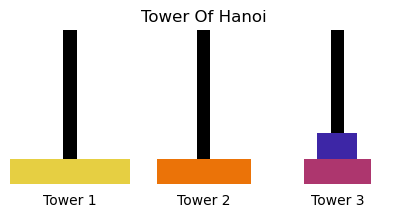

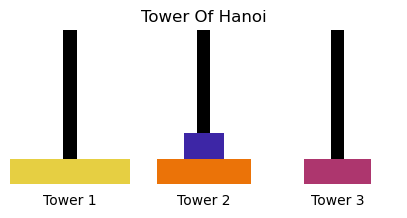

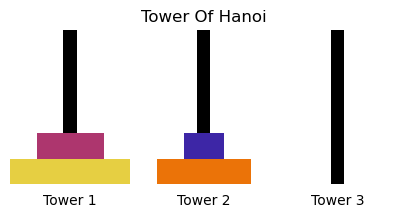

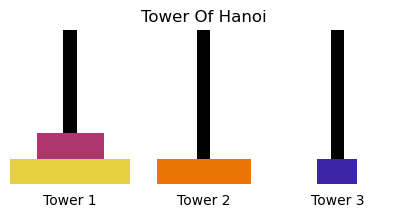

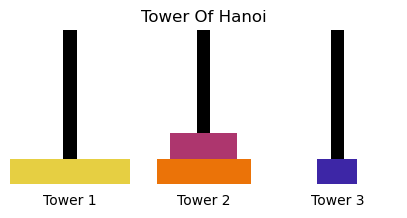

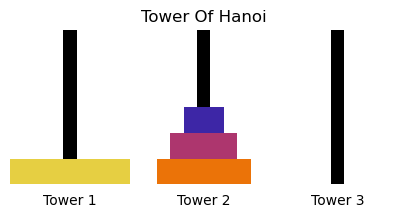

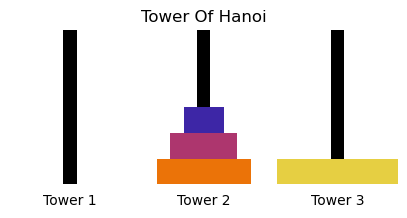

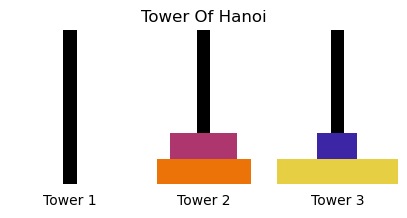

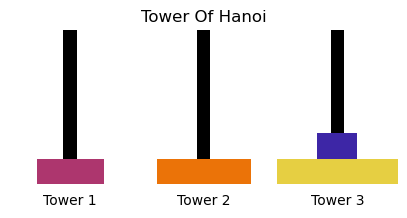

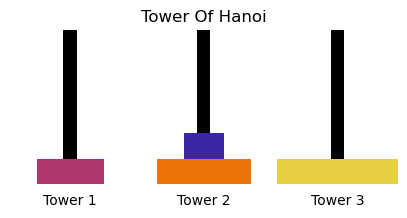

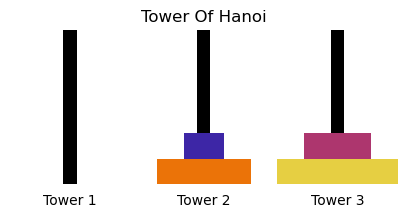

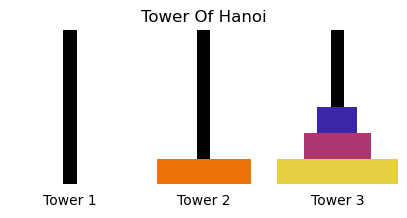

In [33]:
# Define start and goal positions
START = (1,3,3,2) #INPUT START
GOAL = (3,2,3,3) #INPUT GOAL

# Run the BFS algorithm for path finding
nodesExplored, nodesProcessed = depth_first_search(hanoiGraph, start = START, goal = GOAL)
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("Depth-First-Search (DFS) with LIFO Queue")
print()
print("Final path distance :", len(path))
print("Total Number of nodes processed :", nodesProcessed)
print()


# Print the path and show using helper functions
print("Path through the Maze :", path)

for i in path:
    printState(i)

## Uniform-Cost-Search (UCS)

**Uninformed Search** : Focusses on the graph structure and the *cost from start*, but not the *distance from goal*.

In [ ]:
# Uniform-Cost-Search (UCS) with Priority Queue

def uniform_cost_search(hanoiGraph, start, goal):
    ''' Function to perform UCS to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.PriorityQueue()      # Priority Queue for Frontier
    
    # initialization
    frontier.put((0, start))    # Add the start node to frontier with priority 0
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    pathcost = {}               # Dict of cost from start to node
    pathcost[start] = 0         # start to start cost should be 0
    processed = 0               # Count of total nodes processed
    
    while not frontier.empty():
        # get next node from frontier
        currentNode = frontier.get()[1]
        processed += 1
        
        # stop when goal is reached
        if currentNode == goal:
            break
        
        # explore every single neighbor of current node
        for nextNode, weight in hanoiGraph.neighbors(currentNode):
            
            # compute the new cost for the node based on the current node
            newcost = pathcost[currentNode] + weight

            # consider if not yet explored or if the new cost is lower 
            if (nextNode not in explored) or (newcost < pathcost[nextNode]):

                # set priority as newcost 
                priority = newcost
                
                # put new node in frontier with priority
                frontier.put((priority, nextNode))
                
                # assign current node as parent
                explored[nextNode] = currentNode
                
                # keep track of the updated path cost
                pathcost[nextNode] = newcost
    
    return explored, pathcost, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

In [ ]:
# Define start and goal positions
START = (1,3,3,2) #INPUT START
GOAL = (3,2,3,3) #INPUT GOAL

# Run the UCS algorithm for path finding
nodesExplored, pathsExplored, nodesProcessed = uniform_cost_search(hanoigraph, start = START, goal = GOAL)
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("Uniform-Cost-Search (UCS)")
print()

totalNodes = 3*3*3*3
print("Total nodes :", totalNodes)
print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
print("Final path distance :", len(path))
print()

# Print the path and show using helper functions
print("Path through the Maze :", path)
showBinaryMazePath(maze,path)